# Spotify hallgatási adatok elemzése

Alapok:

- Könyvtárak betöltése  
- Adatok beolvasása (JSON fájlok egyesítése egy DataFrame-be)  
- Adatok előkészítése (időbélyeg, percek, kényelmi oszlopok)

Lekérdezések (áttekintés a notebook tartalmáról):

1) Összes hallgatási idő - év és hónap szerint (táblák)  
1/a) Éves összes - oszlopdiagram  
1/b) Havi összes - oszlopdiagram  

2) Toplisták - Top 10 előadó (összes perc) és Top 10 dal (lejátszásszám) (táblák)  
2/c) Top 10 dal - oszlopdiagram (előadó színezéssel)  
2/d) Top 10 előadó - oszlopdiagram  

3) Platform-megoszlás - összes perc és részesedés (%) (tábla)  
3/a) Platform-megoszlás - kördiagram  

4) Top 10 nap - legtöbb hallgatott perc (tábla)  
4/a) Top 10 nap - oszlopdiagram  

5) Aktív napok száma (összes egyedi nap)  

6) Havi előadói diverzitás - egyedi előadók száma (tábla)  
6/a) Havi előadói diverzitás - oszlopdiagram  

7) Hosszú lejátszások aránya (≥ 2 perc) - összesen és havi bontásban (táblák)  
7/b) Hosszú vs rövid lejátszások - kördiagram  
7/c) Hosszú lejátszások aránya - vonaldiagram (havi)  

8) Óránkénti megoszlás - melyik órákban hallgatsz legtöbbet (tábla)  
8/a) Óránkénti megoszlás - oszlopdiagram  

9) Napok szerinti megoszlás - hét mely napjain hallgatsz legtöbbet (tábla)  
9/a) Napok szerinti megoszlás - oszlopdiagram  

10) Átugrási ráta előadónként (mintaszűréssel) - statisztikák (minta, kihagyás, perc, ráta)  
10/c) Átugrási ráta - legalacsonyabb 10 (diagram)  
10/d) Átugrási ráta - legmagasabb 10 (diagram)  
10/e) Legtöbbet hallgatott előadók - átugrási ráta (top 10) - tábla  
10/f) Legtöbbet hallgatott előadók - átugrási ráta (top 10) - diagram  

11) Interaktív - havi top dalok (év/hónap választó) - tábla + diagram  

12) Egyszerű interaktív - beírt előadó → top 10 szám (összes perc) - tábla + diagram  

13) Összes vs. egyedi dalok száma - számok + kördiagram  
13/c) Leghosszabb egyhuzamos lejátszások - top 10 (tábla)  
13/d) Leghosszabb egyhuzamos lejátszások - top 10 (diagram)  

Tipp: A cellákat sorban kell futtatni, ahol van ábra, általában előtte külön cellában látszik a táblázat is. Így könnyebb ellenőrizni az eredményt és megérteni a lépéseket.

In [215]:
# 1) Könyvtárak
import json  # JSON fájlok beolvasásához
from pathlib import Path  # Platformfüggetlen fájl-/útvonalkezeléshez
import numpy as np  # Numerikus műveletekhez (NaN, százalékok, stb.)
import pandas as pd  # Adatkezeléshez és -elemzéshez (DataFrame)
from IPython.display import display  # Táblázatok szép megjelenítéséhez notebookban
import matplotlib.pyplot as plt  # Diagramokhoz
import seaborn as sns  # Stílusosabb diagramokhoz

# Szebb táblázat-kimenet (pandas megjelenítési beállítások)
pd.set_option('display.max_rows', 50)  # Max. megjelenített sorok száma
pd.set_option('display.max_columns', 50)  # Max. megjelenített oszlopok száma
pd.set_option('display.width', 120)  # Kimenet szélessége karakterben

In [216]:
# 2) Adatok beolvasása (egy mappából több JSON egyesítése)
DATA_DIR = Path.cwd() / 'Spotify_Extended_Streaming_History'  # Spotify adatok mappája (állítsd át, ha máshol van)
AUDIO_PAT = 'Streaming_History_Audio_*.json'  # Audio JSON fájlok mintája
VIDEO_PAT = 'Streaming_History_Video_*.json'  # Video JSON fájlok mintája (opcionális)

def read_json_list(p: Path) -> list:
    with p.open('r', encoding='utf-8') as f:  # Fájl megnyitása olvasásra, UTF-8 kódolással
        return json.load(f)  # JSON betöltése (listát várunk)

rows = []  # Ide gyűjtöm az összes rekordot minden fájlból
for p in sorted(DATA_DIR.glob(AUDIO_PAT)):  # Audio fájlok bejárása, név szerint rendezve
    try:
        rows.extend(read_json_list(p))  # A fájlban lévő listát hozzáfűzöm a gyűjtőlistához
    except Exception as e:
        print(f'Hiba audio fájl olvasásakor: {p.name} -> {e}')  # Hiba esetén fájlnév + hiba kiírása
for p in sorted(DATA_DIR.glob(VIDEO_PAT)):  # Video fájlok bejárása, név szerint rendezve
    try:
        rows.extend(read_json_list(p))  # Hozzáfűzöm a videós rekordokat is (ha vannak)
    except Exception as e:
        print(f'Hiba video fájl olvasásakor: {p.name} -> {e}')  # Hiba esetén logolás

df = pd.DataFrame(rows)  # Az összes rekordot táblába teszem (további elemzéshez)
display(df.head(1))  # Minta: első 1 sor megjelenítése ellenőrzésképp

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,audiobook_title,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2018-07-30T15:39:56Z,"Android OS 5.1 API 22 (LENOVO, Lenovo A7010a48)",11648,HU,176.63.30.118,None,None,None,None,#0 - Pilot,The Misfits Podcast,spotify:episode:67vcPiq854ZJhZUjEobsL0,None,None,None,None,clickrow,unexpected-exit-while-paused,False,False,False,NaN,False


In [217]:
# 3) Minimális előkészítés
df = df.copy()  # Másolat készítése, hogy az eredeti DataFrame érintetlen maradjon
df['ts'] = pd.to_datetime(df.get('ts'), utc=True, errors='coerce')  # type: ignore # Időbélyeg datetime-á alakítása UTC-ben; hibás érték -> NaT
df = df.dropna(subset=['ts'])  # Hibás/Nem értelmezhető időbélyegek eldobása

df['sec'] = (df.get('ms_played').fillna(0) / 1000).astype(float)   # type: ignore  # Ezredmásodperc -> másodperc; hiányzó értékek 0-ra töltése
df = df[df['sec'] >= 0]  # Negatív időtartamok kiszűrése (adattisztítás)
df['min'] = df['sec'] / 60.0  # Másodperc -> perc (könnyebb aggregálni)

df['artist'] = df.get('master_metadata_album_artist_name')  # Előadó neve kényelmi oszlopba
df['track']  = df.get('master_metadata_track_name')  # Dal címe kényelmi oszlopba

df['date']  = df['ts'].dt.date  # Csak a dátum része (YYYY-MM-DD)
df['year']  = df['ts'].dt.year  # Év (YYYY)
df['month'] = df['ts'].dt.tz_localize(None).dt.to_period('M').astype(str)  # Hónap (YYYY-MM)
df['hour']  = df['ts'].dt.hour  # Óra (0..23)
df['dow']   = df['ts'].dt.dayofweek  # Hét napja (0=hétfő .. 6=vasárnap)

def simplify_platform(s: str) -> str:  # Platformok egyszerűsítése közös kategóriákra
    if not isinstance(s, str):  # Ha nem szöveg (NaN, None, stb.)
        return 'Other'  # Egyéb kategória
    s = s.lower()  # Kisbetűsítés az összehasonlításhoz
    if 'android' in s: return 'Android'  # Android eszköz
    if 'ios' in s or 'iphone' in s or 'ipad' in s: return 'iOS'  # Apple mobil eszköz
    if 'windows' in s: return 'Windows'  # Windows asztali/kliens
    if 'mac os' in s or 'macos' in s or 'os x' in s: return 'Mac'  # macOS/OS X
    if 'linux' in s: return 'Linux'  # Linux
    return 'Other'  # Egyéb (nem azonosított)

df['platform_simple'] = df.get('platform').apply(simplify_platform)  # type: ignore # Egyszerűsített platform hozzárendelése
df['offline'] = df.get('offline', False).fillna(False).astype(bool) # type: ignore # Offline jelző normalizálása logikaivá
df['skipped'] = df.get('skipped', False).fillna(False).astype(bool)  # type: ignore  # Átugrás jelző normalizálása logikaivá


print(df.shape)  # DataFrame mérete (sor, oszlop)
display(df[['ts','artist','track','min','platform_simple','offline']].head(5))  # Ellenőrző minta megjelenítése

(134514, 33)


C:\Users\gondo\AppData\Local\Temp\ipykernel_10316\975746086.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['offline'] = df.get('offline', False).fillna(False).astype(bool) # type: ignore # Offline jelző normalizálása logikaivá


,ts,artist,track,min,platform_simple,offline
0,2018-07-30 15:39:56+00:00,None,None,0.194133,Android,False
1,2018-07-31 11:57:58+00:00,None,None,0.844417,Android,False
2,2018-07-31 13:18:15+00:00,None,None,18.892517,Android,False
3,2018-07-31 15:39:00+00:00,None,None,18.892517,Android,False
4,2018-08-01 10:33:50+00:00,None,None,2.998250,Android,False


In [218]:
# 1) Összes hallgatási idő – év és hónap szerint (számítás és táblák)

# Éves összesítés táblázat (év → összes perc)
ev = (
    df.groupby('year')['min'].sum()                # Év szerinti csoportosítás, percek összeadása
      .reset_index()                               # Visszaalakítás táblává (index → oszlop)
      .rename(columns={'min': 'Összes perc az évben'})
      .round(1)                                    # 1 tizedesre kerekítés
)

# Havi összesítés táblázat (YYYY-MM → összes perc)
honap = (
    df.groupby('month')['min'].sum()               # Hónap szerinti csoportosítás, percek összeadása
      .reset_index()                               # Táblává alakítás
      .rename(columns={'min': 'Összes perc/hó'})
      .sort_values('month')                        # Időrendi rendezés (YYYY-MM)
      .round(1)
)

print('Éves összesítés:')
display(ev)                           # Ábra megjelenítése

print('Havi összesítés (időrendi):')
display(honap.tail(12))               # Utolsó 12 hónap (friss időszak fókusz)
                                      # Ábra megjelenítése

Éves összesítés:


,year,Összes perc az évben
0,2018,343.7
1,2019,317.9
2,2020,1202.4
3,2021,8397.5
4,2022,37913.3
5,2023,49643.0
6,2024,72056.1
7,2025,50972.2


Havi összesítés (időrendi):


,month,Összes perc/hó
51,2024-10,5201.7
52,2024-11,4466.1
53,2024-12,5082.0
54,2025-01,3799.1
55,2025-02,5968.9
56,2025-03,4882.5
57,2025-04,5135.2
58,2025-05,4262.9
59,2025-06,7919.2
60,2025-07,8519.2


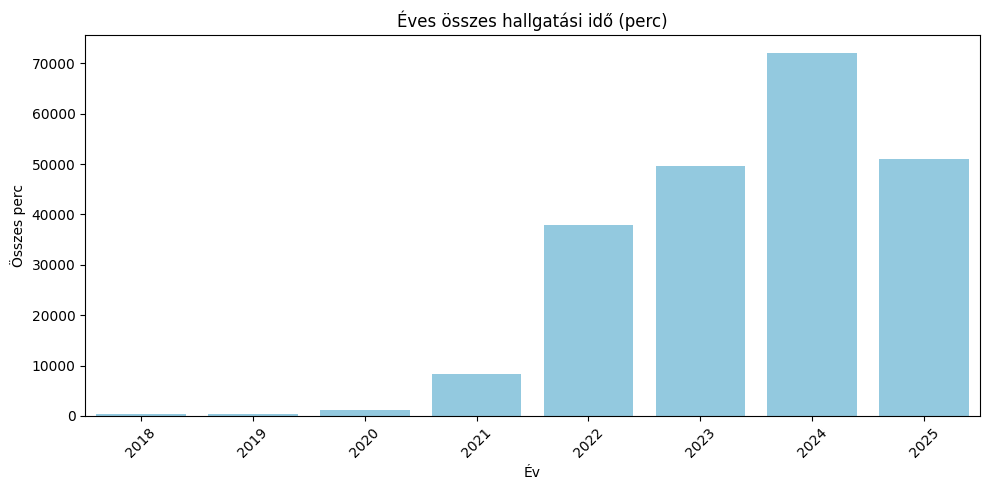

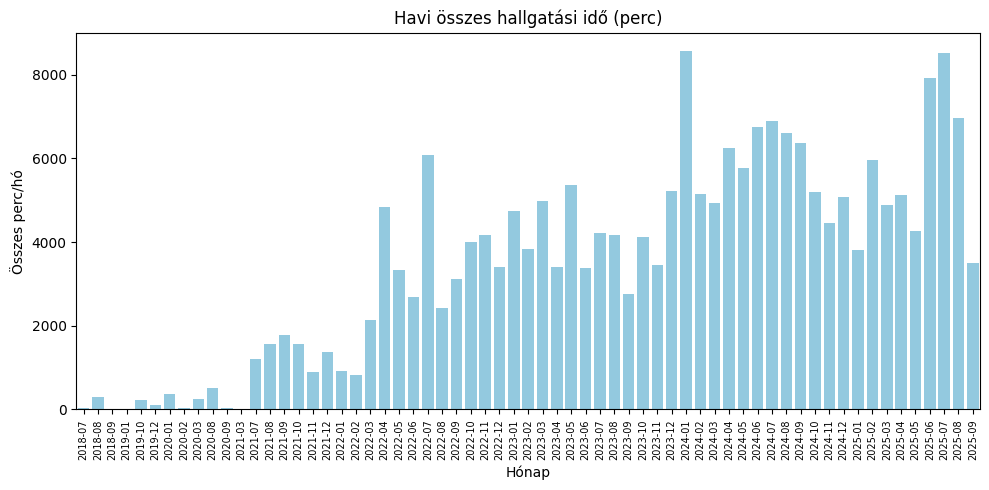

In [219]:
# 1/a) Havi összes hallgatási idő – oszlopdiagram

# Megjelenítés: Éves összes hallgatási idő (oszlopdiagram)
plt.figure(figsize=(10, 5))                        # Ábra mérete (szélesség, magasság)
sns.barplot(data=ev, x='year', y='Összes perc az évben',  color='skyblue')  # Oszlopdiagram
plt.title('Éves összes hallgatási idő (perc)')     # Cím
plt.xlabel('Év')  
plt.ylabel('Összes perc')                          # Y tengely cím
plt.xticks(rotation=45)                            # X tengely felirat forgatása
plt.tight_layout()                                 # Elrendezés optimalizálása
plt.show()  


# 1/b) Havi összes hallgatási idő – oszlopdiagram
plt.figure(figsize=(10,5))
sns.barplot(data=honap, x='month', y='Összes perc/hó', color='skyblue')
plt.tick_params(axis='x', labelsize=7)
plt.xticks(rotation=90)
plt.title('Havi összes hallgatási idő (perc)')
plt.xlabel('Hónap')
plt.ylabel('Összes perc/hó')
plt.tight_layout()
plt.show()

In [220]:
# 2) Toplisták – előadók és dalok (számítás és táblák)
# Bemenet: df (szükséges oszlopok: 'artist' – előadó neve, 'track' – dal címe, 'min' – hallgatott percek)
# Kimenet:
#   - top_artists: előadónként az összes hallgatott perc (Top 10)
#   - top_tracks: előadó–dal páronként az indítások (sorok) száma, azaz hányszor kezdődött lejátszás (Top 10)
# Megjegyzés: a lejátszások száma nem egyenlő az összes hallgatott idővel; az első mennyiségi (count), a második időalapú (sum).

# 2/a) Top 10 előadó (összes perc)
# Lépések:
#  1) Eldobjuk a hiányzó előadó nevű sorokat (dropna),
#  2) Előadónként összegezzük a perceket (groupby + sum),
#  3) Visszaalakítjuk táblává (reset_index),
#  4) Beszédes oszlopnevet adunk ('Összes perc'),
#  5) Csökkenő sorrendbe rendezzük és kiválasztjuk a Top 10-et,
#  6) Kerekítjük az összes percet 1 tizedesre a szebb megjelenítéshez.

top_artists = (
    df.dropna(subset=['artist'])                        # 1) Csak azok a sorok, ahol ismert az előadó neve
      .groupby('artist')['min'].sum()                   # 2) Előadónként percek összege
      .reset_index()                                    # 3) Index vissza oszlopba
      .rename(columns={'min': 'Összes perc'})           # 4) Beszédesebb név
      .sort_values('Összes perc', ascending=False)      # 5) Csökkenő sorrend: legnagyobb felül
      .head(10)                                         #    Top 10 előadó
      .round({'Összes perc': 1})                        # 6) Kerekítés 1 tizedesre
)
print('Top 10 előadó (összes perc):')
display(top_artists)

# 2/b) Top 10 dal (lejátszások száma)
# Lépések:
#  1) Eldobjuk a hiányzó előadó/dal sorokat (dropna),
#  2) Előadó–dal páronként megszámoljuk a sorokat (groupby + size) → ez a lejátszások darabszáma,
#  3) A számlálót oszlopként kérjük vissza (reset_index(name=...)),
#  4) Csökkenő sorrend és Top 10 kiválasztása.
# Megjegyzés: itt a darabszám a lejátszások indításainak száma, nem az időtartam.

top_tracks = (
    df.dropna(subset=['artist','track'])                # 1) Csak teljes (előadó+dal) sorok
      .groupby(['artist','track']).size()               # 2) Előadó–dal páronként előfordulásszám (indítások száma)
      .reset_index(name='Lejátszások száma')            # 3) Számláló oszlop névvel
      .sort_values('Lejátszások száma', ascending=False)# 4) Csökkenő sorrend
      .head(10)                                         #    Top 10 dal
)
print('Top 10 dal (lejátszások száma):')
display(top_tracks)

Top 10 előadó (összes perc):


,artist,Összes perc
719,Eminem,22989.2
1554,NF,18776.3
1878,Ryan Caraveo,8406.3
2493,mgk,7741.6
1145,Kanye West,5908.0
1164,Kendrick Lamar,5584.4
1103,Joyner Lucas,5318.7
2338,Witt Lowry,4330.7
1226,Krúbi,3917.0
306,Beton.Hofi,3866.8


Top 10 dal (lejátszások száma):


,artist,track,Lejátszások száma
2353,Eminem,Lucky You (feat. Joyner Lucas),382
2439,Eminem,Till I Collapse,360
7568,XXXTENTACION,SAD!,336
5244,NF,Nate,306
5203,NF,DRIFTING,305
5232,NF,Let You Down,298
2061,EDEN,Wake Up,292
5260,NF,Remember This,286
2372,Eminem,No Regrets (feat. Don Toliver),278
6199,Ryan Caraveo,From Hell With Love,274


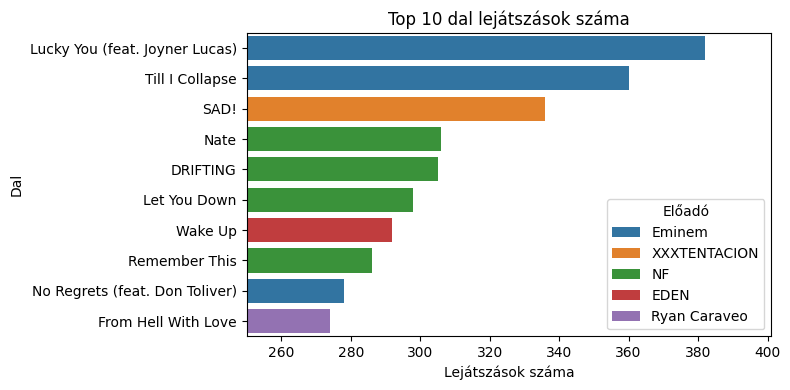

In [221]:
# 2/c) Top 10 dal – oszlopdiagram (előadó színezéssel)
plt.figure(figsize=(8,4))
sns.barplot(data=top_tracks, x='Lejátszások száma', y='track', hue='artist', dodge=False)
plt.title('Top 10 dal lejátszások száma')
plt.xlabel('Lejátszások száma')
plt.ylabel('Dal')
plt.xlim(left=250)
plt.tight_layout()
plt.legend(title='Előadó')
plt.show()

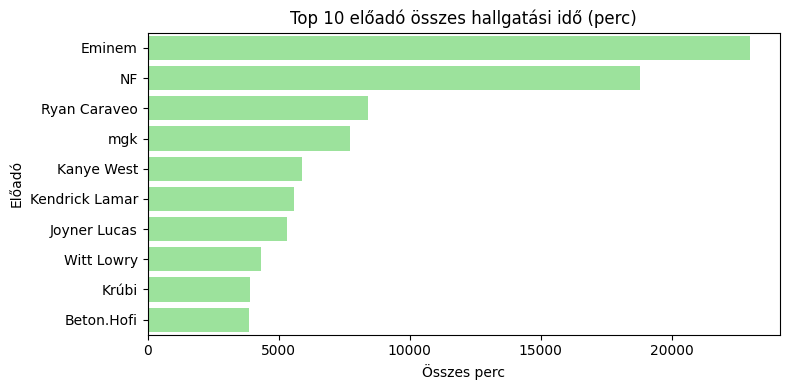

In [222]:
# 2/d) Top 10 előadó – oszlopdiagram
plt.figure(figsize=(8,4))
sns.barplot(data=top_artists, x='Összes perc', y='artist', color='lightgreen')
plt.title('Top 10 előadó összes hallgatási idő (perc)')
plt.xlabel('Összes perc')
plt.ylabel('Előadó')
plt.tight_layout()
plt.show()

In [223]:
# 3) Platform-megoszlás – összes perc és részesedés (%) (számítás és táblázat)

# Bemenet: df['platform_simple'] (kategória), df['min'] (perc)
# Kimenet: 'plat' táblázat: platform_simple, Összes perc, Részesedés (%)
# Lépések:
#  1) platform_simple szerint összegezzük a perceket,
#  2) beszédes oszlopnévre nevezzük át ('Összes perc'), csökkenő sorrend,
#  3) kiszámítjuk a százalékos részesedést a teljesen belül (0 osztás ellen védve),
#  4) kerekítés és megjelenítés.

plat = (
    df.groupby('platform_simple')['min'].sum().reset_index()   # 1) Platformonként percek összege
      .rename(columns={'min': 'Összes perc'})                  # 2) Beszédes név
      .sort_values('Összes perc', ascending=False)             #    Csökkenő sorrend
)

osszes = plat['Összes perc'].sum()                             # Teljes perc (nevező)
plat['Részesedés (%)'] = 100 * plat['Összes perc'] / (osszes if osszes else np.nan)  # 3) Százalék

display(plat.round({'Összes perc': 1, 'Részesedés (%)': 2}))  # 4) Kerekítés és táblázat

,platform_simple,Összes perc,Részesedés (%)
2,Windows,142936.6,64.72
0,Android,77802.6,35.23
1,Other,106.9,0.05


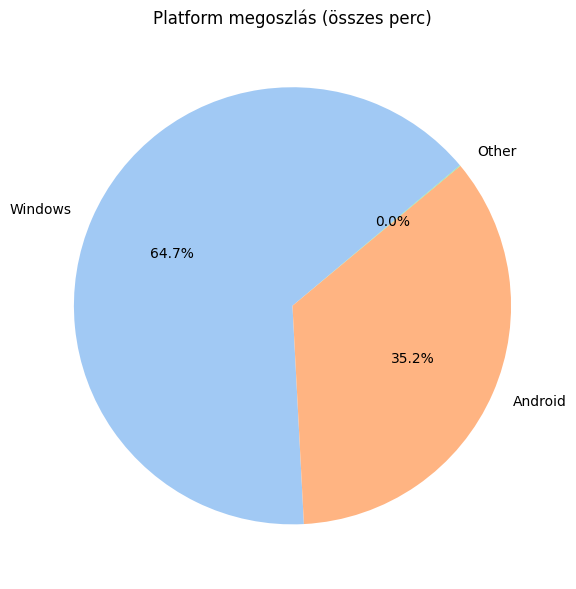

In [224]:
# 3/a) Platform-megoszlás – kördiagram
plt.figure(figsize=(6,6))
plt.pie(
    plat['Összes perc'],
    labels=plat['platform_simple'].astype(str).tolist(), 
    autopct='%1.1f%%',
    startangle=40,
    colors=sns.color_palette('pastel'),
)
plt.title('Platform megoszlás (összes perc)')
plt.tight_layout()
plt.show()

In [225]:
# 4) Top 10 nap – legtöbb hallgatott perc (számítás és táblázat)

# Bemenet: df['date'] (dátum), df['min'] (perc)
# Kimenet: 'napok' tábla: date, Összes perc; megjelenítve a Top 10 sor.
# Lépések:
#  1) naponként összegezzük a perceket,
#  2) beszédes névre nevezzük át, csökkenő sorrend,
#  3) Top 10 kivágása és kerekítés.

napok = (
    df.groupby('date')['min'].sum().reset_index()              # 1) Napokra aggregálás
      .rename(columns={'min': 'Összes perc'})                  # 2) Beszédes név
      .sort_values('Összes perc', ascending=False)             #    Csökkenő sorrend
)

print('Top 10 nap (legtöbb hallgatott perc):')
display(napok.head(10).round({'Összes perc': 1}))             # 3) Top 10 és kerekítés

Top 10 nap (legtöbb hallgatott perc):


,date,Összes perc
1094,2024-08-05,878.5
893,2024-01-17,621.4
894,2024-01-18,564.3
1419,2025-06-29,561.8
1101,2024-08-12,557.7
547,2023-01-29,553.3
1028,2024-05-31,548.0
1413,2025-06-23,547.4
896,2024-01-20,524.1
1451,2025-07-31,509.2


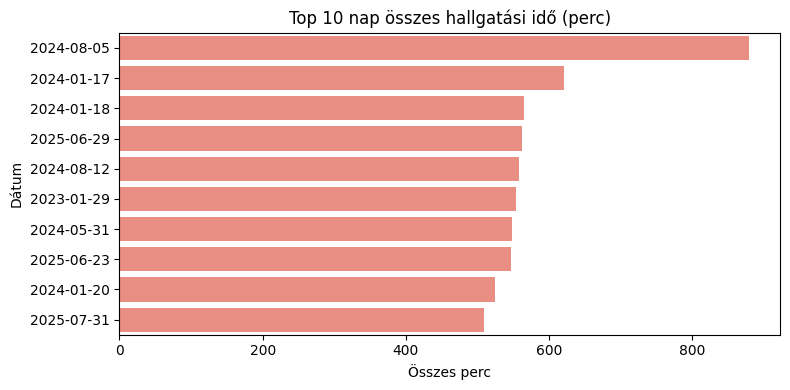

In [226]:
# 4/a) Top 10 nap – oszlopdiagram
plt.figure(figsize=(8,4))
sns.barplot(data=napok.head(10), x='Összes perc', y='date', color='salmon')
plt.title('Top 10 nap összes hallgatási idő (perc)')
plt.xlabel('Összes perc')
plt.ylabel('Dátum')
plt.tight_layout()
plt.show()

In [227]:
# 5) Aktív napok száma (összes egyedi nap)
# Cél: hány napon hallgattál zenét legalább egyszer (aktív napok száma).
# Bemenet: 'napok' tábla (előző cellából): date oszlop
# Kimenet: egy egész szám (print)

aktiv_napok = napok['date'].nunique()
print(f'Összes aktív nap száma: {aktiv_napok:,}')

Összes aktív nap száma: 1,504


In [228]:
# 6) Havi előadói diverzitás – egyedi előadók száma

# Bemenet: df['month'], df['artist']
# Kimenet: 'div' tábla: hónap (YYYY-MM), egyedi előadók száma.
# Lépések:
#  1) eldobni a hiányzó előadó nevű sorokat,
#  2) hónaponként megszámolni az egyedi előadókat (nunique),
#  3) rendezni időrendben, és megjeleníteni az utolsó 12 hónapot.

div = (
    df.dropna(subset=['artist'])
      .groupby('month')['artist'].nunique()                    # 2) Egyedi előadók száma hónaponként
      .reset_index(name='Egyedi előadók száma')                # Táblázatos forma
      .sort_values('month')                                    # 3) Időrendi rendezés
)

display(div.tail(12))                                          # Utolsó 12 hónap

,month,Egyedi előadók száma
46,2024-10,258
47,2024-11,272
48,2024-12,377
49,2025-01,233
50,2025-02,229
51,2025-03,226
52,2025-04,286
53,2025-05,369
54,2025-06,502
55,2025-07,383


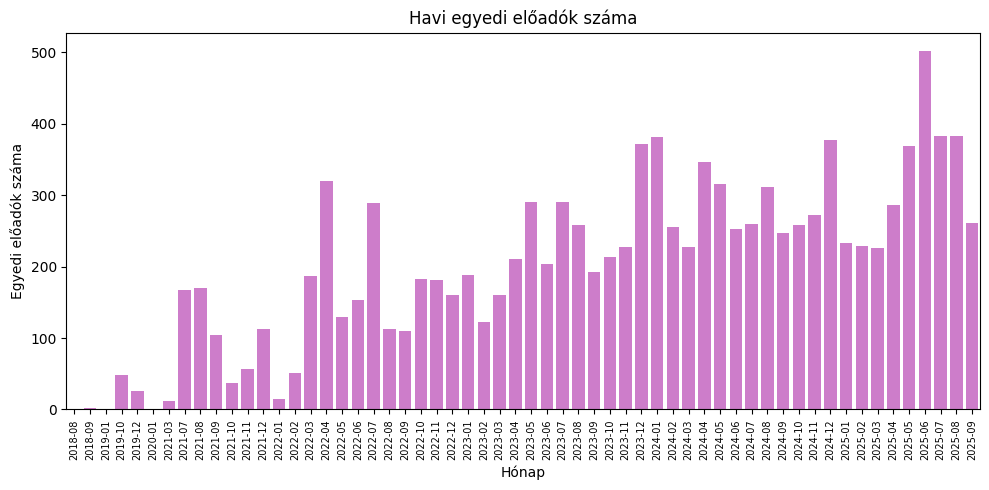

In [229]:
# 6/a) Havi előadói diverzitás – oszlopdiagram
plt.figure(figsize=(10,5))
sns.barplot(data=div, x='month', y='Egyedi előadók száma', color='orchid')
plt.tick_params(axis='x', labelsize=7)
plt.xticks(rotation=90)
plt.title('Havi egyedi előadók száma')
plt.xlabel('Hónap')
plt.ylabel('Egyedi előadók száma')
plt.tight_layout()
plt.show()

In [230]:
# 7) Hosszú lejátszások aránya (≥ 2 perc) – összesen és havi bontásban (számítás és táblázat)

# Bemenet: df['min'] (perc), df['ts'] (időbélyeg)
# Kimenet: összes arány %, és egy havi tábla (havi mintaszám, hosszú darabszám, arány)
# Lépések:
#  1) létrehozunk egy logikai oszlopot (hosszu), hogy a sor eléri-e a küszöböt,
#  2) kiszámoljuk az összes és a hosszú darabszámot, majd az összes arányt,
#  3) havi szinten aggregáljuk a mintaszámot és a hosszú darabszámot, és számolunk százalékot.

kuszob_perc = 2.0                                             # Küszöb percben

_tmp = df.assign(hosszu=lambda x: x['min'] >= kuszob_perc)    # 1) Logikai jelző oszlop

lejatszas_db = int(len(_tmp))                                 # 2) Összes lejátszás (sor)
hosszu_db = int(_tmp['hosszu'].sum())                         #    Hosszú lejátszások darabszáma

ossz_arany = 100 * hosszu_db / lejatszas_db if lejatszas_db else np.nan
print(f'Összes hosszú lejátszás aránya (≥ {kuszob_perc} perc): {ossz_arany:.1f}%')

havi = (
        _tmp.assign(Ev_es_honap=_tmp['ts'].dt.tz_localize(None).dt.to_period('M').astype(str)) # Hónap oszlop (YYYY-MM)
        .groupby('Ev_es_honap') 
        .agg(lejatszas_db=('hosszu','size'), hosszu_db=('hosszu','sum')) # 3) Havi mintaszám + hosszú db
        .assign(hosszu_szazalek=lambda t: 100 * t['hosszu_db'] / t['lejatszas_db']) #    Havi százalék
        .reset_index()
        .sort_values('Ev_es_honap')     # Időrendi rendezés
)

display(havi.tail(12).round({'hosszu_szazalek': 1}))          # Utolsó 12 hónap

Összes hosszú lejátszás aránya (≥ 2.0 perc): 41.5%


,Ev_es_honap,lejatszas_db,hosszu_db,hosszu_szazalek
51,2024-10,3161,1304,41.3
52,2024-11,3533,1103,31.2
53,2024-12,4586,1258,27.4
54,2025-01,3134,929,29.6
55,2025-02,3254,1524,46.8
56,2025-03,2957,1231,41.6
57,2025-04,2943,1285,43.7
58,2025-05,3911,1074,27.5
59,2025-06,4939,2062,41.7
60,2025-07,5124,2184,42.6


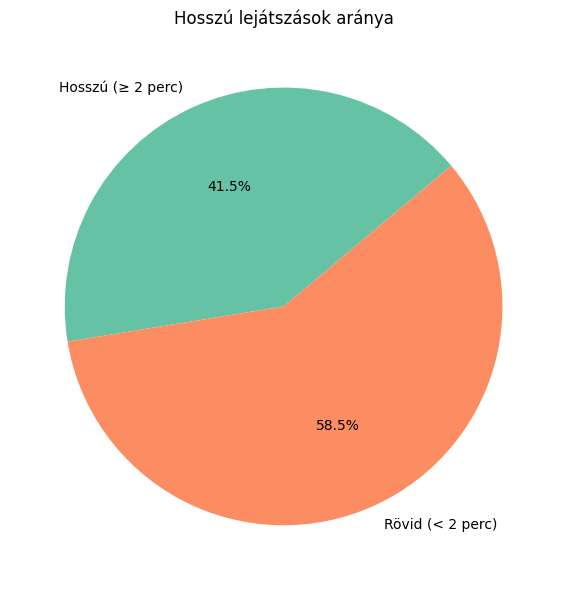

In [231]:
# 7/b) Hosszú vs rövid lejátszások – kördiagram
long_plays = pd.DataFrame({
    'Típus': ['Hosszú (≥ 2 perc)', 'Rövid (< 2 perc)'],
    'Darabszám': [hosszu_db, lejatszas_db - hosszu_db]
})
plt.figure(figsize=(6,6))
plt.pie(long_plays['Darabszám'], labels=long_plays['Típus'].tolist(), autopct='%1.1f%%', startangle=40, colors=sns.color_palette('Set2'))
plt.title('Hosszú lejátszások aránya')
plt.tight_layout()
plt.show()

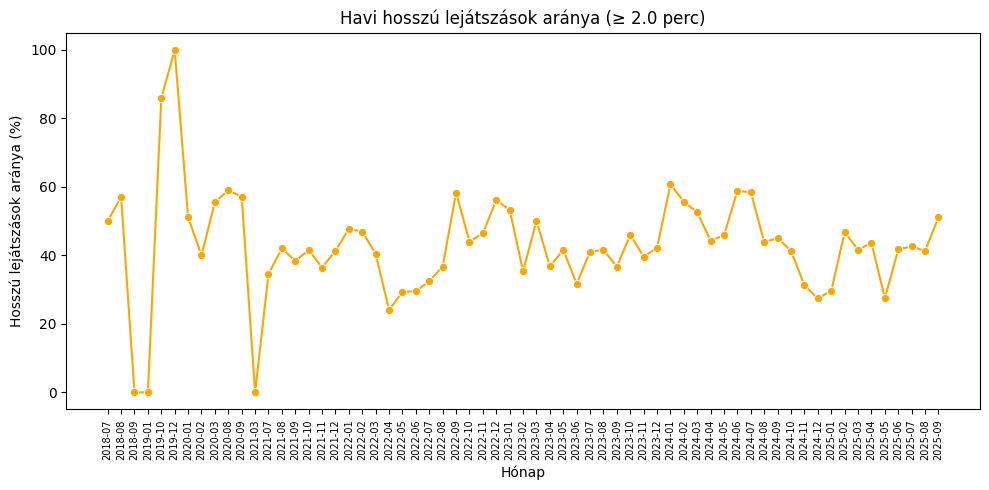

In [232]:
# 7/c) Hosszú lejátszások aránya – vonaldiagram (havi)
plt.figure(figsize=(10,5))
sns.lineplot(data=havi, x='Ev_es_honap', y='hosszu_szazalek', marker='o', color='orange')
plt.tick_params(axis='x', labelsize=7)
plt.xticks(rotation=90)
plt.title(f'Havi hosszú lejátszások aránya (≥ {kuszob_perc} perc)')
plt.xlabel('Hónap')
plt.ylabel('Hosszú lejátszások aránya (%)')
plt.tight_layout()
plt.show()

In [233]:
# 8) Óránkénti megoszlás – melyik órákban hallgatsz legtöbbet (táblázat)

# Bemenet: df['hour'], df['min']
# Kimenet: 'ora' tábla: hour, Összes perc; plusz a top 5 óra külön kiírva.
# Lépések:
#  1) óránként összegezzük a perceket, kerekítünk,
#  2) időrendbe rendezzük (0..23),
#  3) megjelenítjük a teljes táblát és a top5-öt külön.

ora = (
    df.groupby('hour')['min'].sum().reset_index()             # 1) Óránként percek összege
      .rename(columns={'min':'Összes perc'})
      .round(2)
)
ora = ora.sort_values('hour')                                  # 2) Időrendi rendezés

print('Óránkénti megoszlás (0..23):')
display(ora)                                                   # 3) Teljes tábla

print('Top 5 óra a legtöbb perccel:')
display(ora.sort_values('Összes perc', ascending=False)       #    Top 5 kivágása és kerekítés
          .head(5)
          .round({'Összes perc':1}))

Óránkénti megoszlás (0..23):


,hour,Összes perc
0,0,10719.65
1,1,8506.66
2,2,5344.09
3,3,2422.94
4,4,1011.95
5,5,1877.17
6,6,2309.65
7,7,2534.52
8,8,3701.61
9,9,5535.66


Top 5 óra a legtöbb perccel:


,hour,Összes perc
17,17,14841.7
16,16,14170.8
13,13,13542.9
15,15,13500.8
14,14,13416.0


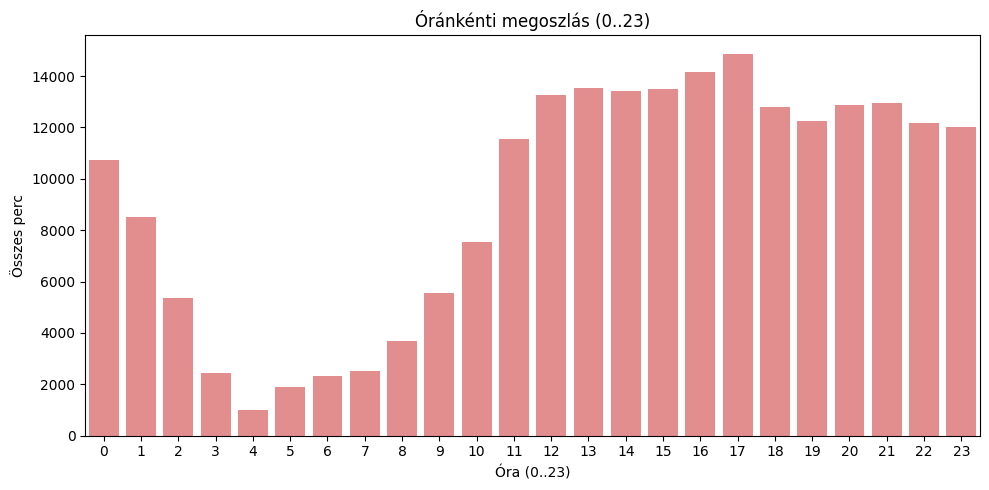

In [234]:
# 8/a) Óránkénti megoszlás – oszlopdiagram
plt.figure(figsize=(10,5))
sns.barplot(data=ora, x='hour', y='Összes perc', color='lightcoral')
plt.title('Óránkénti megoszlás (0..23)')
plt.xlabel('Óra (0..23)')
plt.ylabel('Összes perc')
plt.tight_layout()
plt.show()

In [235]:
# 9) Napok szerinti megoszlás – hét mely napjain hallgatsz legtöbbet (táblázat)

# Bemenet: df['dow'] (0=hétfő..6=vasárnap), df['min']
# Kimenet: 'nap' tábla magyar napnevekkel és összes perccel, valamint a top 3 nap.
# Lépések:
#  1) dow szerint összegezzük a perceket,
#  2) hétfőtől vasárnapig rendezzük,
#  3) magyar napneveket adunk,
#  4) csak a szükséges oszlopokat tartjuk meg,
#  5) megjelenítés + top 3 nap külön.

nap = (
    df.groupby('dow')['min'].sum().reset_index()               # 1) Hét napja szerint aggregálás
      .rename(columns={'min':'Összes perc'})
)
nap = nap.sort_values('dow')                                    # 2) Hétfőtől vasárnapig

nap['Nap'] = nap['dow'].map({                                   # 3) Magyar napnevek
    0:'Hétfő', 1:'Kedd', 2:'Szerda', 3:'Csütörtök', 4:'Péntek', 5:'Szombat', 6:'Vasárnap'
})
nap = nap[['Nap','Összes perc']]                                # 4) Letisztított tábla

display(nap)                                                    # 5) Megjelenítés

print('Top 3 nap:')
display(nap.sort_values('Összes perc', ascending=False)
          .head(3)
          .round({'Összes perc':1}))

,Nap,Összes perc
0,Hétfő,35123.045700
1,Kedd,28982.355683
2,Szerda,31394.055383
3,Csütörtök,31687.185217
4,Péntek,35217.164167
5,Szombat,29799.511967
6,Vasárnap,28642.823433


Top 3 nap:


,Nap,Összes perc
4,Péntek,35217.2
0,Hétfő,35123.0
3,Csütörtök,31687.2


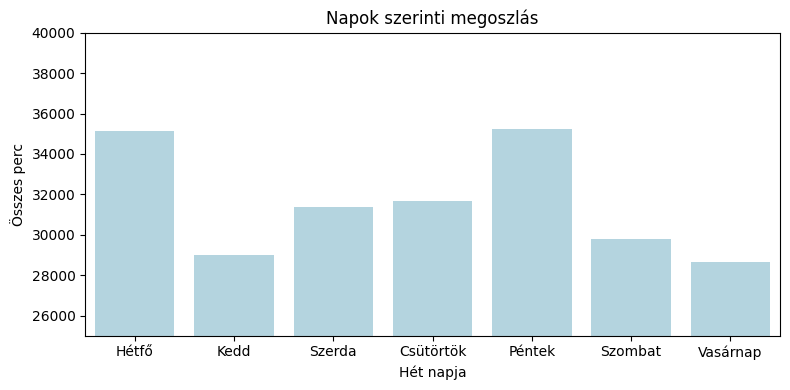

In [236]:
# 9/a) Napok szerinti megoszlás – oszlopdiagram
plt.figure(figsize=(8,4))
sns.barplot(data=nap, x='Nap', y='Összes perc', color='lightblue')
plt.ylim(25000, 40000)
plt.title('Napok szerinti megoszlás')
plt.xlabel('Hét napja')
plt.ylabel('Összes perc')
plt.tight_layout()
plt.show()

In [237]:
# 10) Átugrási ráta előadónként (mintaszűrés mellett) – számítás és táblák
# Cél: megbecsülni, előadónként milyen gyakran ugrod át a lejátszásokat.

# Bemenet: df['skipped'] (bool), df['artist'], df['min']
# Kimenet: 'stats' tábla: minta (sorok száma), kihagyás (True-k), perc (összes hallgatott perc), Átugrási ráta (%)
# Lépések:
#  1) normalizáljuk a skipped oszlopot bool értékekre,
#  2) előadónként aggregálunk: mintaszám, kihagyások száma, összes perc,
#  3) mintaküszöböt alkalmazunk (>=175) a stabilabb százalékokért,
#  4) rátát számolunk százalékban.

# Másolat készítése az adathalmazról, hogy az eredeti ne sérüljön
sk = df.copy()
# 1) Normalizálás: a 'skipped' oszlopot logikai értékre hozzuk (hiányzó értékek False)
sk['skipped'] = sk.get('skipped', False).fillna(False).astype(bool) # type: ignore  # 1) Normalizálás

# 2) Aggregálás előadónként: mintaszám (összes sor), kihagyás (True-k száma), összes perc
stats = (
    sk.dropna(subset=['artist'])                                      # 2) Csak ismert előadó
      .groupby('artist')
      .agg(minta=('skipped','size'), kihagyas=('skipped','sum'), perc=('min','sum'))
      .reset_index()
    )

# 3) Mintaküszöb: csak azok az előadók, akiknél legalább 175 minta van
stats = stats[stats['minta'] >= 175].copy()                            # 3) Mintaküszöb
# 4) Átugrási ráta (%) kiszámítása: kihagyás / mintaszám * 100
stats['Átugrási ráta (%)'] = 100 * stats['kihagyas'] / stats['minta']  # 4) Százalék

# 10/a) Átugrási ráta előadónként – top 10 (legmagasabb ráta)
print('Legmagasabb átugrási ráta – top 10:')
display(stats.sort_values('Átugrási ráta (%)', ascending=False)
            .head(10)
            .round({'Átugrási ráta (%)':2, 'perc':1}))


# 10/b) Átugrási ráta előadónként – flop 10 (legalacsonyabb ráta)
print('\nLegalacsonyabb átugrási ráta – top 10:')
display(stats.sort_values('Átugrási ráta (%)', ascending=True)
            .head(10)
            .round({'Átugrási ráta (%)':2, 'perc':1}))

Legmagasabb átugrási ráta – top 10:


,artist,minta,kihagyas,perc,Átugrási ráta (%)
77,AWS,282,214,375.5,75.89
1290,Lil Frakk,294,222,338.8,75.51
1226,Krúbi,2037,1462,3917.0,71.77
230,BEATó,442,311,456.3,70.36
675,Dé:Nash,306,214,533.5,69.93
797,Frank Ocean,248,173,323.2,69.76
1535,Munn,175,118,231.3,67.43
469,Chris Brown,191,127,237.4,66.49
808,Future,176,115,197.7,65.34
30,50 Cent,566,368,781.4,65.02



Legalacsonyabb átugrási ráta – top 10:


,artist,minta,kihagyas,perc,Átugrási ráta (%)
1997,Skylar Grey,272,62,640.0,22.79
336,Bo Burnham,815,209,1728.2,25.64
1308,Lilly Wood and The Prick,236,70,292.0,29.66
690,Ed Sheeran,522,177,689.9,33.91
1665,OneRepublic,211,73,377.6,34.60
816,GAYLE,210,73,257.6,34.76
1742,Polo G,719,251,1150.1,34.91
1009,James Arthur,292,107,617.4,36.64
2200,Tom Odell,254,99,420.8,38.98
714,Emcee KB,622,243,1234.0,39.07


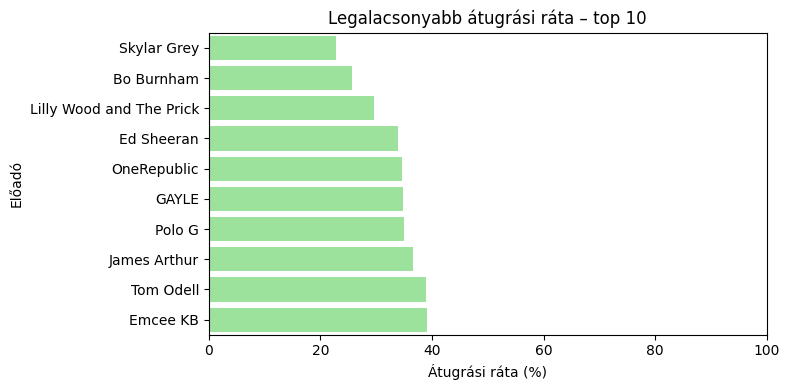

In [238]:
# 10/c) Átugrási ráta – legalacsonyabb 10 (diagram)
low_sk = stats.sort_values('Átugrási ráta (%)', ascending=True).head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=low_sk, x='Átugrási ráta (%)', y='artist', color='lightgreen')
plt.title('Legalacsonyabb átugrási ráta – top 10')
plt.xlabel('Átugrási ráta (%)')
plt.ylabel('Előadó')
plt.xlim(0,100)
plt.tight_layout()
plt.show()

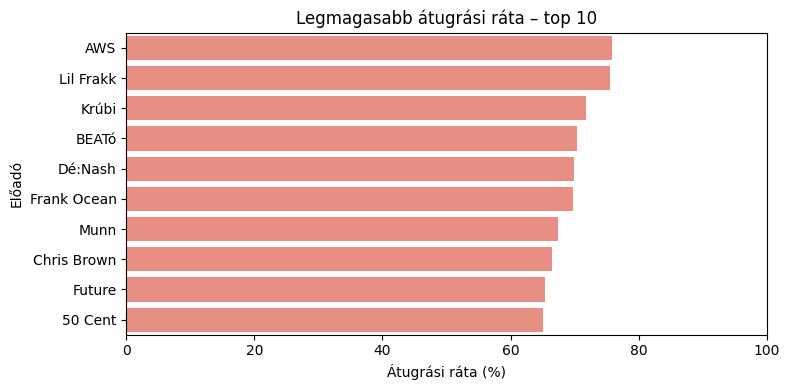

In [239]:
# 10/d) Átugrási ráta – legmagasabb 10 (diagram)
top_sk = stats.sort_values('Átugrási ráta (%)', ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=top_sk, x='Átugrási ráta (%)', y='artist', color='salmon')
plt.title('Legmagasabb átugrási ráta – top 10')
plt.xlabel('Átugrási ráta (%)')
plt.ylabel('Előadó')
plt.xlim(0,100)
plt.tight_layout()
plt.show()

In [240]:
# 10/e) Legtöbbet hallgatott előadók – átugrási ráta (top 10) – táblázat és diagram

# Bemenet: 'stats' tábla (előző cellákból)
# Kimenet: top_listened tábla + vízszintes oszlopdiagram

# Táblázat
top_listened = stats.sort_values('perc', ascending=False).head(10)
print('Legtöbbet hallgatott előadók átugrási rátája (top 10):')
display(top_listened[['artist','minta','kihagyas','Átugrási ráta (%)','perc']]
        .round({'Átugrási ráta (%)':2, 'perc':1}))



Legtöbbet hallgatott előadók átugrási rátája (top 10):


,artist,minta,kihagyas,Átugrási ráta (%),perc
719,Eminem,13012,6109,46.95,22989.2
1554,NF,11305,4590,40.60,18776.3
1878,Ryan Caraveo,4489,2125,47.34,8406.3
2493,mgk,4613,2613,56.64,7741.6
1145,Kanye West,3178,1750,55.07,5908.0
1164,Kendrick Lamar,2800,1645,58.75,5584.4
1103,Joyner Lucas,2758,1476,53.52,5318.7
2338,Witt Lowry,1881,1041,55.34,4330.7
1226,Krúbi,2037,1462,71.77,3917.0
306,Beton.Hofi,2215,1246,56.25,3866.8


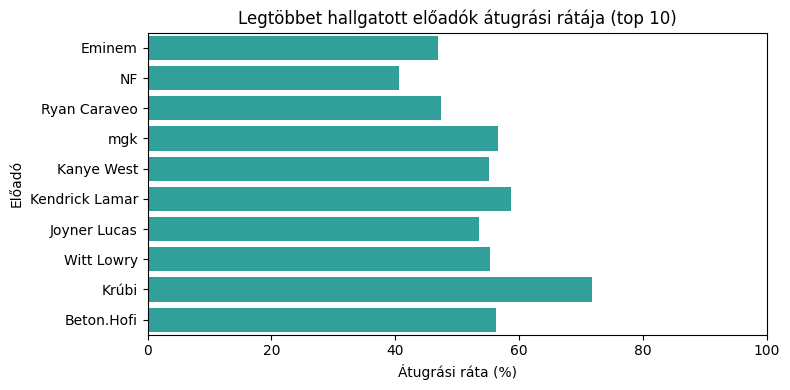

In [241]:
# 10/f) Legtöbbet hallgatott előadók – átugrási ráta (top 10) – diagram
plt.figure(figsize=(8,4))
sns.barplot(data=top_listened, x='Átugrási ráta (%)', y='artist', color='lightseagreen')
plt.title('Legtöbbet hallgatott előadók átugrási rátája (top 10)')
plt.xlabel('Átugrási ráta (%)')
plt.ylabel('Előadó')
plt.xlim(0,100)
plt.tight_layout()
plt.show()

In [242]:
# 11) Interaktív – havi top dalok (év/hónap választó)
# Cél: egy kiválasztott hónapban a legtöbbet hallgatott dalok listája és diagramja.

# Bemenet: df['month'], df['artist'], df['track'], df['min']
# Kimenet: Top 20 dal táblázat + vízszintes oszlopdiagram előadó-színezéssel.

# Lépések:
#  1) legördülő widget a hónap kiválasztásához,
#  2) szűrés a kiválasztott hónapra, aggregálás (lejátszások száma + összes perc),
#  3) táblázat megjelenítés (HTML középre igazítva),
#  4) diagram megjelenítés.

# Szükséges csomagok importálása
import ipywidgets as widgets  # Interaktív widgetek
from IPython.display import display, clear_output, HTML  # Megjelenítéshez, HTML-hez, kimenet törléséhez

# 1) Elérhető hónapok kigyűjtése, rendezve
available_months = sorted(df['month'].dropna().unique())  # Hónapok listája, hiányzó értékek nélkül, rendezve

# 2) Dropdown widget létrehozása a hónap kiválasztásához
month_selector = widgets.Dropdown(
    options=available_months,  # Opciók: elérhető hónapok
    value=available_months[-1],  # Alapértelmezett: legutolsó hónap
    description='Hónap:',  # Felirat a widget mellett
    style={'description_width': 'initial'},  # Felirat stílusa
    layout=widgets.Layout(width='300px')  # Widget szélessége
    )

# 3) Output widget a dinamikus tartalomhoz
output = widgets.Output()  # Ebbe írjuk a táblázatot és ábrát

# 4) Függvény, ami frissíti a top dalokat a kiválasztott hónap alapján
def update_top_tracks(change=None):
    with output:  # Az output widgetbe írunk
        clear_output(wait=True)  # Előző kimenet törlése (villogás elkerülése)
        selected_month = month_selector.value  # Kiválasztott hónap lekérése

        # 2) Top dalok (darabszám + összes perc) kiszámítása
        top = (
            df[df['month'] == selected_month]  # Csak a kiválasztott hónap sorai
              .dropna(subset=['artist','track'])  # Csak ismert előadó+dal párok
              .groupby(['artist','track'])  # Csoportosítás előadó és dal szerint
              .agg(**{'Lejátszások száma': ('track', 'size'),  # Lejátszások száma (sorok száma)
                        'Összes perc': ('min', 'sum')})  # Összes hallgatott perc
              .reset_index()  # Index vissza oszlopba
              .sort_values('Lejátszások száma', ascending=False)  # Csökkenő sorrend
              .head(20)  # Top 20 dal
        )

        print(f'Legtöbbet hallgatott előadó és szám {selected_month}-ban:')  # Cím kiírása

        # 3) Táblázat középre igazítva, HTML formázással
        styled_html = top.to_html(index=False, justify='center', float_format=lambda x: f"{x:.1f}" if isinstance(x, float) else str(x))  # Táblázat HTML-re alakítása, középre igazítva
        display(HTML(f'<div style="display: flex; justify-content: center; margin-bottom: 60px;">{styled_html}</div>'))  # HTML megjelenítése

        # 4) (11/b) Diagram: vízszintes oszlopdiagram előadó színezéssel
        plt.figure(figsize=(10,5))  # Ábra mérete
        sns.barplot(data=top, x='Lejátszások száma', y='track', hue='artist', dodge=False)  # Oszlopdiagram, előadó színezéssel
        plt.title(f'Legtöbbet hallgatott előadó és szám {selected_month}-ban')  # Cím
        plt.xlabel('Lejátszások száma')  # X tengely felirat
        plt.ylabel('Dal')  # Y tengely felirat
        plt.legend(title='Előadó')  # Jelmagyarázat címe
        plt.tight_layout()  # Elrendezés optimalizálása
        plt.show()  # Ábra megjelenítése

# 5) Widget összekötése a frissítő függvénnyel
month_selector.observe(update_top_tracks, names='value')  # Ha változik a kiválasztott hónap, frissít

# 6) Widgetek és output megjelenítése
display(month_selector)  # Dropdown megjelenítése
display(output)  # Output helye
update_top_tracks()  # Induló frissítés, hogy rögtön látszódjon valami

Dropdown(description='Hónap:', index=62, layout=Layout(width='300px'), options=('2018-07', '2018-08', '2018-09…

Output()

In [243]:
# 12) Egyszerű interaktív – adj meg egy előadót → top 10 szám (összes perc)
# Cél: beírsz egy előadót, kapsz egy top 10 dalt az összes hallgatott perc szerint.

# Bemenet: df['artist'], df['track'], df['min']
# Kimenet: top 10 dal táblázat és vízszintes oszlopdiagram.

# Lépések:
#  1) szövegmező + gomb,
#  2) beírt névre kis/nagybetűtől független egyezés,
#  3) aggregálás dalonként (összes perc), rendezés, top 10,
#  4) táblázat + diagram megjelenítés.

# Szükséges csomagok importálása
import ipywidgets as widgets  # Interaktív widgetek
from IPython.display import display, clear_output  # Megjelenítéshez, kimenet törléséhez

print('Írj be egy előadó nevet, majd nyomj OK-t. (Nem case sensitive)')  # Felhasználói útmutató

# 1) Szövegmező létrehozása az előadó nevének beírásához
artist_input = widgets.Text(
    placeholder='Előadó neve',  # Segédszöveg
    description='Előadó:',  # Felirat a mező mellett
    style={'description_width': 'initial'},  # Felirat stílusa
    layout=widgets.Layout(width='300px')  # Mező szélessége
)

# 2) OK gomb létrehozása
ok_button = widgets.Button(
    description='OK',  # Gomb felirata
    button_style='success',  # Zöld szín
    layout=widgets.Layout(width='80px', height='32px')  # Gomb mérete
)

# 3) Output widget a dinamikus tartalomhoz
output_artist = widgets.Output()  # Ebbe írjuk a táblázatot és ábrát

# 4) Függvény, ami frissíti a top dalokat a beírt előadó alapján
def on_ok_clicked(b=None):
    with output_artist:  # Az output widgetbe írunk
        clear_output(wait=True)  # Előző kimenet törlése
        name = artist_input.value.strip()  # Beírt név (szóközök levágása)
        if not name:  # Ha nincs beírva semmi
            print('Írj be egy előadó nevet, majd nyomj OK-t.')
            return

        # 2) Case-insensitive egyezés: kis/nagybetűtől függetlenül keresünk
        mask = df['artist'].fillna('').str.lower() == name.lower()
        sub = df[mask]  # Csak a beírt előadó sorai
        if sub.empty:  # Ha nincs találat
            print(f'Nincs találat: {name}')
            return

        # 3) Top 10 dal kiszámítása: összes perc dalonként, csökkenő sorrend
        top = (
            sub.dropna(subset=['track'])  # Csak ismert dalcímek
               .groupby('track')['min'].sum()  # Összes perc dalonként
               .reset_index(name='Összes perc')  # Index vissza oszlopba
               .sort_values('Összes perc', ascending=False)  # Csökkenő sorrend
               .head(10)  # Top 10 dal
        )

        print(f'Top 10 szám {name} előadótól (összes perc):')  # Cím kiírása
        display(top.round({'Összes perc': 1}))  # Táblázat megjelenítése

        # 4) Diagram: vízszintes oszlopdiagram
        plt.figure(figsize=(8,4))  # Ábra mérete
        sns.barplot(data=top, x='Összes perc', y='track', color='purple')  # Oszlopdiagram
        plt.title(f'Top 10 {name} szám (összes perc)')  # Cím
        plt.xlabel('Összes perc')  # X tengely felirat
        plt.ylabel('Dal')  # Y tengely felirat
        plt.tight_layout()  # Elrendezés optimalizálása
        plt.show()  # Ábra megjelenítése

# 5) Gomb összekötése a frissítő függvénnyel
ok_button.on_click(on_ok_clicked)  # Gombnyomásra frissít

# 6) Widgetek és output megjelenítése
display(widgets.HBox([artist_input, ok_button]))  # Szövegmező és gomb egysorban
display(output_artist)  # Output helye

Írj be egy előadó nevet, majd nyomj OK-t. (Nem case sensitive)


Output()

In [244]:
# 13) Összes vs. egyedi dalok száma – számítás és kördiagram (extra)

# Bemenet: df['artist'], df['track']
# Kimenet: két egész szám + (következő cellában) kördiagram.

# Összes lejátszás darabszám (ismétlésekkel)
total_tracks_count = df.dropna(subset=['artist', 'track']).shape[0]


# 13/a) Összes és egyedi darabszám
# Egyedi dalok száma (ismétlések nélkül – előadó+dal egyedi párok)
unique_tracks_count = (
    df.dropna(subset=['artist', 'track'])
      .drop_duplicates(subset=['artist', 'track'])
      .shape[0]
)

print(f'Összesen {total_tracks_count:,} dalt hallgattam meg.')
print(f'Összesen {unique_tracks_count:,} egyedi dalt hallgattam meg.')

Összesen 134,235 dalt hallgattam meg.
Összesen 8,203 egyedi dalt hallgattam meg.


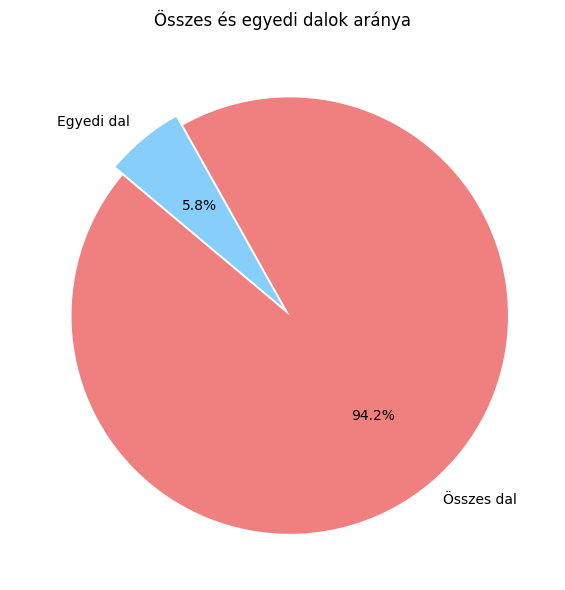

In [245]:
# 13/b) Összes vs. egyedi dalok – kördiagram
# Cél: az összes lejátszás és az egyedi dalok arányának vizualizálása.
labels = ['Összes dal', 'Egyedi dal']
sizes = [total_tracks_count, unique_tracks_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.05, 0)  # az első szelet (Összes) enyhe kiemelése

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Összes és egyedi dalok aránya')
plt.tight_layout()
plt.show()

In [246]:
# 13/c) Leghosszabb egyhuzamos lejátszások – top 10 (extra)
# Cél: mely daloknál fordult elő a leghosszabb, egybefüggő hallgatási idő.
# Bemenet: df['artist'], df['track'], df['sec'] (másodperc), df['ts'] (időbélyeg)
# Kimenet: 'longest_sessions' tábla (Top 10), és egy vízszintes oszlopdiagram előadó színezéssel.
# Megjegyzés: itt a max() az adott előadó–dal páron belüli legnagyobb egyhuzamos lejátszási időt adja vissza.

longest_sessions = (
    df.dropna(subset=['artist', 'track'])
      .sort_values('ts')
      .groupby(['artist', 'track'])['sec']
      .max()
      .reset_index(name='Leghosszabb egyhuzamos lejátszás (sec)')
      .sort_values('Leghosszabb egyhuzamos lejátszás (sec)', ascending=False)
      .head(10)
)

print('Top 10 dal a leghosszabb egyhuzamos lejátszási idő alapján (másodperc):')
display(longest_sessions.round({'Leghosszabb egyhuzamos lejátszás (sec)': 1}))


Top 10 dal a leghosszabb egyhuzamos lejátszási idő alapján (másodperc):


,artist,track,Leghosszabb egyhuzamos lejátszás (sec)
1902,Drake,Family Matters,3603.1
4025,Kendrick Lamar,"Sing About Me, I'm Dying Of Thirst",1718.4
1735,Dax,The Next Rap God 2,1697.4
5881,Powfu,"death bed, Pt. 2",1407.2
7520,Witt Lowry,Wonder If You Wonder,1333.3
2440,Eminem,Tobey (feat. Big Sean and BabyTron),1242.0
172,AJR,Turning Out Pt. ii,1233.0
3077,J. Cole,4 Your Eyez Only,1144.2
3618,Joyner Lucas,Tear Me Down,1130.4
2278,Eminem,Drug Ballad,1126.1


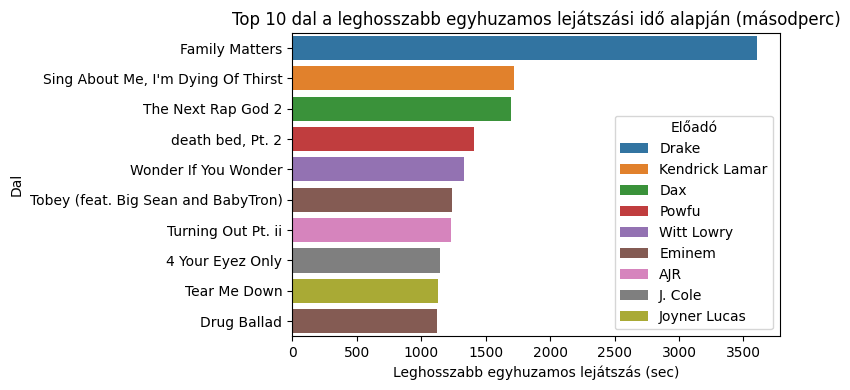

In [247]:
# 13/d) Leghosszabb egyhuzamos lejátszások – top 10 (diagram)

plt.figure(figsize=(8,4))
sns.barplot(data=longest_sessions, x='Leghosszabb egyhuzamos lejátszás (sec)', y='track', hue='artist', dodge=False)
plt.title('Top 10 dal a leghosszabb egyhuzamos lejátszási idő alapján (másodperc)')
plt.xlabel('Leghosszabb egyhuzamos lejátszás (sec)')
plt.ylabel('Dal')
plt.legend(title='Előadó')
plt.tight_layout()
plt.show()